In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [62]:
dataset = pd.read_csv('Mall_customers.csv')
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [63]:
# we only need the matrix of features
X = dataset.iloc[:,3:].values # we take only last two features only for easiness of visualization

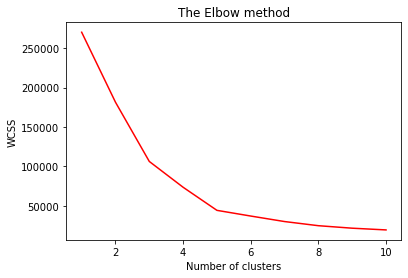

In [64]:
# using elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss,'r-')
plt.title('The Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [65]:
# from the graph the optimal number of clusters = 5
# train the model
kmeans = KMeans(n_clusters=5,init='k-means++',random_state=42)
y_kmeans = kmeans.fit_predict(X)

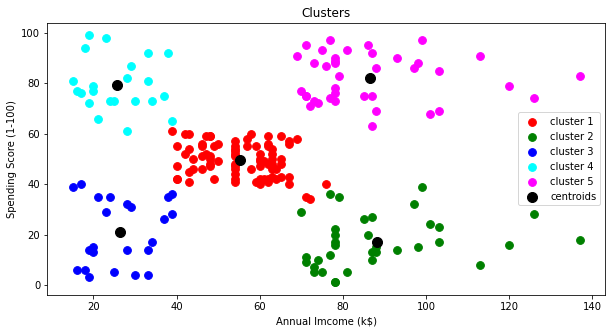

In [66]:
# visualize the clusters
plt.figure(figsize=(10,5))
plt.scatter(X[y_kmeans==0,0] ,X[y_kmeans==0,1],s = 60,c = 'red',label = 'cluster 1')
plt.scatter(X[y_kmeans==1,0] ,X[y_kmeans==1,1],s = 60,c = 'green',label = 'cluster 2')
plt.scatter(X[y_kmeans==2,0] ,X[y_kmeans==2,1],s = 60,c = 'blue',label = 'cluster 3')
plt.scatter(X[y_kmeans==3,0] ,X[y_kmeans==3,1],s = 60,c = 'cyan',label = 'cluster 4')
plt.scatter(X[y_kmeans==4,0] ,X[y_kmeans==4,1],s = 60,c = 'magenta',label = 'cluster 5')
# we also plot the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s = 100,c ='black',label = 'centroids' )
plt.title('Clusters')
plt.xlabel('Annual Imcome (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()